# Completeness Check

In [1]:
# Building Equipment Verification Analysis
# =====================================
# This notebook verifies that customer equipment data contains all relevant 
# technical equipment typically found in buildings by comparing with sample data

import pandas as pd
import numpy as np
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("📋 Building Equipment Verification Tool")
print("=" * 50)

📋 Building Equipment Verification Tool


In [2]:
# Data Loading and Initial Exploration
# ====================================

def load_and_explore_data():
    """Load both Excel files and perform initial exploration"""
    print("🔄 Loading data files...")
    
    # Load the data
    customer_df = pd.read_excel("Kundendatei.xlsx")
    sample_df = pd.read_excel("Beispielobjekte.xlsx")
    
    print(f"✅ Customer data loaded: {len(customer_df)} rows, {len(customer_df.columns)} columns")
    print(f"✅ Sample data loaded: {len(sample_df)} rows, {len(sample_df.columns)} columns")
    
    return customer_df, sample_df

# Load data
customer_df, sample_df = load_and_explore_data()

# %%
# Display basic information about the datasets
print("\n📊 DATASET OVERVIEW")
print("=" * 30)

print("\n🏢 Customer Data Structure:")
display(customer_df.head())

print(f"\nColumns in Customer Data ({len(customer_df.columns)}):")
for i, col in enumerate(customer_df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*50)

print("\n🏗️ Sample Data Structure:")
display(sample_df.head())

print(f"\nColumns in Sample Data ({len(sample_df.columns)}):")
for i, col in enumerate(sample_df.columns, 1):
    print(f"{i:2d}. {col}")


🔄 Loading data files...
✅ Customer data loaded: 973 rows, 61 columns
✅ Sample data loaded: 7021 rows, 14 columns

📊 DATASET OVERVIEW

🏢 Customer Data Structure:


,WirtEinh,EQ_übergeordnet,Equipment,EQ-Bezeichnung,EQ-Klasse,EQ-Klasse-Bezeichnung,Gewerk,Anlagenausprägung,EQ-Menge,EQ-Merkmal_001,EQ-Merkmal_002,EQ-Merkmal_003,EQ-Merkmal_004,EQ-Merkmal_005,EQ-Merkmal_006,EQ-Merkmal_007,EQ-Merkmal_008,EQ-Merkmal_009,EQ-Merkmal_010,EQ-Merkmal_011,EQ-Merkmal_012,EQ-Merkmal_013,EQ-Merkmal_014,EQ-Merkmal_015,EQ-Merkmal_016,EQ-Merkmal_017,EQ-Merkmal_018,EQ-Merkmal_019,EQ-Merkmal_020,EQ-Merkmal_021,EQ-Merkmal_022,EQ-Merkmal_023,EQ-Merkmal_024,EQ-Merkmal_025,EQ-Merkmal_026,EQ-Merkmal_027,EQ-Merkmal_028,EQ-Merkmal_029,EQ-Merkmal_030,EQ-Merkmal_031,EQ-Merkmal_032,EQ-Merkmal_033,EQ-Merkmal_034,EQ-Merkmal_035,EQ-Merkmal_036,EQ-Merkmal_037,EQ-Merkmal_038,EQ-Merkmal_039,EQ-Merkmal_040,EQ-Merkmal_041,EQ-Merkmal_042,EQ-Merkmal_043,EQ-Merkmal_044,EQ-Merkmal_045,EQ-Merkmal_046,EQ-Merkmal_047,EQ-Merkmal_048,EQ-Merkmal_049,EQ-Merkmal_050,EQ-Merkmal_051,EQ-Merkmal_052
0,21083,NaN,1000005794,Schutzraumlüftung - Mitt.(Außer Betrieb),31211,Lüftungsanlagen,RLT,Schutzraumlüft. ohne Sandfilt.,1,NaN,Hygiene VDI 6022: Nein,"Nutzung RLT: Gebäude, Büro",Zuluftvolumenstrom tatsächlich: 500,Zuluftvolumenstrom Nennvol.: 500,Ventilator Antriebsart: Direkt ohne aut. Lasta...,Brandlüftung: keine Brandlüftungsfunktion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zugehörige Verbraucher: Sonstige,NaN,Schnittstelle BuES/GLT: keine,"Funktionsweise der MSR: analog, Standard-Regelung",Fabrikat der MSR: SCHALTER,Typ der MSR: SCHALTER,Zwischenkontrolle RLT: keine Zwischenprfg. erf...,"Sonderbau-Prüfungen: Nein, keine",NaN,Kostengruppe DIN 276-1: 431,Bezeichn. Kostengr. DIN 276-1: Lüftungsanlagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21083,NaN,1000005932,RLT Batterieraum alt - Mittelbau,31211,Lüftungsanlagen,RLT,Zu-/Abluftanlage,1,NaN,Hygiene VDI 6022: Nein,Nutzung RLT: Systemtechnik,Zuluftvolumenstrom tatsächlich: 500,Zuluftvolumenstrom Nennvol.: 500,Ventilator Antriebsart: Riemen,Brandlüftung: keine Brandlüftungsfunktion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zugehörige Verbraucher: Batterieraum,NaN,Schnittstelle BuES/GLT: BuES,"Funktionsweise der MSR: digital, Standard-Rege...",Fabrikat der MSR: STAEFA,Typ der MSR: STAEFA REGELUNG,Zwischenkontrolle RLT: keine Zwischenprfg. erf...,"Sonderbau-Prüfungen: Nein, keine",NaN,Kostengruppe DIN 276-1: 431,Bezeichn. Kostengr. DIN 276-1: Lüftungsanlagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21083,NaN,1000005934,RLT Gleichr. alt - Mittelbau,31211,Lüftungsanlagen,RLT,Zu-/Abluftanlage,1,NaN,Hygiene VDI 6022: Nein,Nutzung RLT: Systemtechnik,Zuluftvolumenstrom tatsächlich: 6200,Zuluftvolumenstrom Nennvol.: 6289,Ventilator Antriebsart: Riemen,Brandlüftung: keine Brandlüftungsfunktion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zugehörige Verbraucher: FSV Raum (GLR),NaN,Schnittstelle BuES/GLT: BuES,"Funktionsweise der MSR: analog, Standard-Regelung",Fabrikat der MSR: STAEFA,Typ der MSR: STAEFA REGELUNG,Zwischenkontrolle RLT: keine Zwischenprfg. erf...,"Sonderbau-Prüfungen: Nein, keine",NaN,Kostengruppe DIN 276-1: 431,Bezeichn. Kostengr. DIN 276-1: Lüftungsanlagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21083,NaN,1000025596,"Gebäude-Blitzschutz-, Erdungsanl., Pot.",3330,Blitzschutz-/Erdungsanlage,Elektro Blitzschutz,Blitzschutz/Erdung Gebäude,1,Ableiter Anzahl aussen: 11,NaN,Blitzschutzklasse: III (ehemals mittel),Bruttogeschossfläche Gebäude: 1.001 bis 5.000 m²,Gebäudeart: Technikgebäude,"Sonderbau-Prüfungen: Nein, keine",NaN,Kostengruppe DIN 276-1: 446,Bezeichn. Kostengr. DIN 276-1: Blitzschutz- u....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21083,NaN,1000026066,Beschallungs-/Sprechanlagen,3520,Elektroakustische Anlagen,Haustechn Einricht,Beschallungsanlage,1,NaN,NaN,NaN,Schnittstelle BuES/GLT: keine,"So


Columns in Customer Data (61):
 1. WirtEinh
 2. EQ_übergeordnet
 3. Equipment
 4. EQ-Bezeichnung
 5. EQ-Klasse
 6. EQ-Klasse-Bezeichnung
 7. Gewerk
 8. Anlagenausprägung
 9. EQ-Menge
10. EQ-Merkmal_001
11. EQ-Merkmal_002
12. EQ-Merkmal_003
13. EQ-Merkmal_004
14. EQ-Merkmal_005
15. EQ-Merkmal_006
16. EQ-Merkmal_007
17. EQ-Merkmal_008
18. EQ-Merkmal_009
19. EQ-Merkmal_010
20. EQ-Merkmal_011
21. EQ-Merkmal_012
22. EQ-Merkmal_013
23. EQ-Merkmal_014
24. EQ-Merkmal_015
25. EQ-Merkmal_016
26. EQ-Merkmal_017
27. EQ-Merkmal_018
28. EQ-Merkmal_019
29. EQ-Merkmal_020
30. EQ-Merkmal_021
31. EQ-Merkmal_022
32. EQ-Merkmal_023
33. EQ-Merkmal_024
34. EQ-Merkmal_025
35. EQ-Merkmal_026
36. EQ-Merkmal_027
37. EQ-Merkmal_028
38. EQ-Merkmal_029
39. EQ-Merkmal_030
40. EQ-Merkmal_031
41. EQ-Merkmal_032
42. EQ-Merkmal_033
43. EQ-Merkmal_034
44. EQ-Merkmal_035
45. EQ-Merkmal_036
46. EQ-Merkmal_037
47. EQ-Merkmal_038
48. EQ-Merkmal_039
49. EQ-Merkmal_040
50. EQ-Merkmal_041
51. EQ-Merkmal_042
52. EQ-Merkmal_043

,Gebäude-ID,Anlagentyp,Anlagen-ID,Bauteil der Anlage,Anlagenname,Untergewerk-ID,Untergewerk,AKS-Bezeichnung,Kostengruppe,Kostengruppenbezeichnung,Anzahl,Hinweis Preisermittlung,Merkmale,Verbandsnummer
0,2026,Anlage,71610,NaN,Kleinkaltwassersatz 109 kW,1246,434,Kompressionskältemaschine,430,Lufttechnische Anlagen,1.0,NaN,Kälteleistung:109 kW; Kältemittel:R410A; Kälte...,434.01.02.000.01.01
1,2026,Anlage,71611,NaN,Kleinkaltwassersatz 237kW,1246,434,Kompressionskältemaschine,430,Lufttechnische Anlagen,1.0,NaN,Kälteleistung:237 kW; Kältemittel:R410A; Kälte...,434.01.02.000.01.01
2,2026,Anlage,71612,NaN,Kältenetz Dach - Deckenkühlung & Fancoil,1250,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,Anzahl Heizkreise:5 Stk.; Heizkreis (Art):dyna...,434.03.01.000.01.02
3,2026,Bauteil,71624,71612.0,Ausdehnungsgefäß Dach,1526,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,"max. zulässiger Betriebsdruck:; Volumen:0,05 m3;",NaN
4,2026,Bauteil,71613,71612.0,Ausdehnungsgefäß Kälteverteiler 1. OG,1526,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,max. zulässiger Betriebsdruck:10 bar; Volumen:...,NaN



Columns in Sample Data (14):
 1. Gebäude-ID
 2. Anlagentyp
 3. Anlagen-ID
 4. Bauteil der Anlage
 5. Anlagenname
 6. Untergewerk-ID
 7. Untergewerk
 8. AKS-Bezeichnung
 9. Kostengruppe
10. Kostengruppenbezeichnung
11. Anzahl
12. Hinweis Preisermittlung
13. Merkmale
14. Verbandsnummer


In [3]:
# Data Cleaning and Preparation
# =============================

def clean_and_prepare_data(customer_df, sample_df):
    """Clean and prepare data for analysis"""
    print("🧹 Cleaning and preparing data...")
    
    # Create copies to avoid modifying original data
    customer_clean = customer_df.copy()
    sample_clean = sample_df.copy()
    
    # Remove empty rows
    customer_clean = customer_clean.dropna(subset=['Equipment'], how='all')
    sample_clean = sample_clean.dropna(subset=['Anlagenname'], how='all')
    
    # Create cleaned text columns for comparison
    # Customer data
    if 'EQ-Bezeichnung' in customer_clean.columns:
        customer_clean['EQ-Bezeichnung_clean'] = customer_clean['EQ-Bezeichnung'].astype(str).str.strip().str.lower()
    if 'EQ-Klasse-Bezeichnung' in customer_clean.columns:
        customer_clean['EQ-Klasse-Bezeichnung_clean'] = customer_clean['EQ-Klasse-Bezeichnung'].astype(str).str.strip().str.lower()
    if 'Gewerk' in customer_clean.columns:
        customer_clean['Gewerk_clean'] = customer_clean['Gewerk'].astype(str).str.strip().str.lower()
    
    # Sample data
    sample_clean['Anlagenname_clean'] = sample_clean['Anlagenname'].astype(str).str.strip().str.lower()
    sample_clean['AKS-Bezeichnung_clean'] = sample_clean['AKS-Bezeichnung'].astype(str).str.strip().str.lower()
    #if 'Untergewerk' in sample_clean.columns:
    #    sample_clean['Untergewerk_clean'] = sample_clean['Untergewerk'].astype(str).str.strip().str.lower()
    
    print(f"✅ Customer data after cleaning: {len(customer_clean)} rows")
    print(f"✅ Sample data after cleaning: {len(sample_clean)} rows")
    
    return customer_clean, sample_clean

# Clean the data
customer_clean, sample_clean = clean_and_prepare_data(customer_df, sample_df)

🧹 Cleaning and preparing data...
✅ Customer data after cleaning: 973 rows
✅ Sample data after cleaning: 7021 rows



📈 EQUIPMENT CATEGORY ANALYSIS

🏢 Customer Equipment Categories (67):


IZS-Komponenten                    342
IZS-Zutrittskontrollzentrale        55
Niederspannungsleitungsanlagen      42
Lüftungsanlagen                     38
Kleinlöschgeräte                    28
Innenbeleuchtungseinrichtungen      27
Feuer-/Rauchschutzabschlüsse        24
Abwasserleitungsanlagen             24
Hebeanlagen/Entwässerungspumpen     21
Warenverkaufseinrichtungen          20
Name: EQ-Klasse-Bezeichnung, dtype: int64

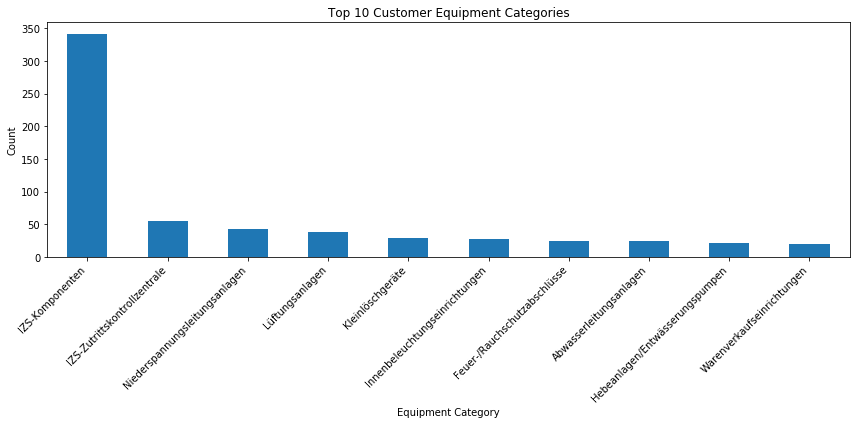


🏗️ Sample Equipment Categories (113):


Außentür                                 1765
Handfeuerlöscher                          690
Wärmeverteilnetz                          569
Niederspannungshauptverteiler             320
GA-Schaltschränke                         245
NS-Unterverteiler                         227
Abluftanlage                              177
Verteilnetz / Pumpen - Kälteerzeugung     168
Abläufe                                   166
Sicherheitsbeleuchtungsanlage             147
Name: AKS-Bezeichnung, dtype: int64

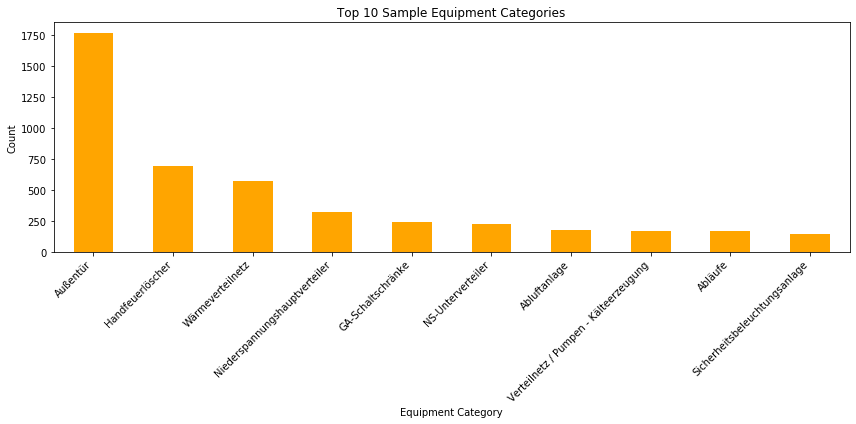

In [4]:
# Equipment Category Analysis
# ==========================

def analyze_equipment_categories(customer_df, sample_df):
    """Analyze and visualize equipment categories"""
    
    print("\n📈 EQUIPMENT CATEGORY ANALYSIS")
    print("=" * 40)
    
    # Customer equipment categories
    customer_categories = {}
    if 'EQ-Klasse-Bezeichnung' in customer_df.columns:
        customer_categories = customer_df['EQ-Klasse-Bezeichnung'].value_counts()
        
        print(f"\n🏢 Customer Equipment Categories ({len(customer_categories)}):")
        display(customer_categories.head(10))
        
        # Visualization
        plt.figure(figsize=(12, 6))
        customer_categories.head(10).plot(kind='bar')
        plt.title('Top 10 Customer Equipment Categories')
        plt.xlabel('Equipment Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Sample equipment categories  
    sample_categories = {}
    if 'AKS-Bezeichnung' in sample_df.columns:
        sample_categories = sample_df['AKS-Bezeichnung'].value_counts()
        
        print(f"\n🏗️ Sample Equipment Categories ({len(sample_categories)}):")
        display(sample_categories.head(10))
        
        # Visualization
        plt.figure(figsize=(12, 6))
        sample_categories.head(10).plot(kind='bar', color='orange')
        plt.title('Top 10 Sample Equipment Categories')
        plt.xlabel('Equipment Category') 
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    return customer_categories, sample_categories

# Analyze categories
customer_cats, sample_cats = analyze_equipment_categories(customer_clean, sample_clean)

In [14]:
# %%
# Missing Equipment Analysis
# =========================

def find_missing_equipment(customer_df, sample_df):
    """Find equipment types present in sample but missing in customer data"""
    
    print("\n🔍 MISSING EQUIPMENT ANALYSIS")
    print("=" * 35)
    
    # Get unique equipment types from sample
    sample_equipment = set()
    if 'AKS-Bezeichnung_clean' in sample_df.columns:
        sample_equipment.update(sample_df['AKS-Bezeichnung_clean'].dropna().unique())
    #if 'Untergewerk_clean' in sample_df.columns:
    #    sample_equipment.update(sample_df['Untergewerk_clean'].dropna().unique())
    
    # Get unique equipment from customer data
    customer_equipment = set()
    if 'EQ-Klasse-Bezeichnung_clean' in customer_df.columns:
        customer_equipment.update(customer_df['EQ-Klasse-Bezeichnung_clean'].dropna().unique())
    if 'EQ-Bezeichnung_clean' in customer_df.columns:
        customer_equipment.update(customer_df['EQ-Bezeichnung_clean'].dropna().unique())
    if 'Gewerk_clean' in customer_df.columns:
        customer_equipment.update(customer_df['Gewerk_clean'].dropna().unique())
    
    # Remove 'nan' entries
    sample_equipment = {eq for eq in sample_equipment if eq != 'nan'}
    customer_equipment = {eq for eq in customer_equipment if eq != 'nan'}
    
    # Find missing equipment
    missing_equipment = []
    potentially_missing = []
    
    for sample_eq in sample_equipment:
        # Direct match check
        if sample_eq not in customer_equipment:
            # Check for partial matches
            partial_matches = [cust_eq for cust_eq in customer_equipment 
                             if sample_eq in cust_eq or cust_eq in sample_eq]
            
            if not partial_matches:
                missing_equipment.append(sample_eq)
            else:
                potentially_missing.append((sample_eq, partial_matches[:3]))  # Limit to 3 matches
    
    # Display results
    print(f"📊 Analysis Results:")
    print(f"   • Sample equipment types: {len(sample_equipment)}")
    print(f"   • Customer equipment types: {len(customer_equipment)}")
    print(f"   • Definitely missing: {len(missing_equipment)}")
    print(f"   • Potentially missing: {len(potentially_missing)}")
    
    if missing_equipment:
        print(f"\n❌ Definitely Missing Equipment ({len(missing_equipment)}):")
        missing_df = pd.DataFrame({'Missing Equipment': sorted(missing_equipment)})
        display(missing_df)
    
    if potentially_missing:
        print(f"\n⚠️ Potentially Missing Equipment ({len(potentially_missing)}):")
        potential_df = pd.DataFrame([
            {'Sample Equipment': eq, 'Similar in Customer Data': ', '.join(matches)} 
            for eq, matches in potentially_missing
        ])
        display(potential_df.head(10))
    
    return missing_equipment, potentially_missing

# Find missing equipment
missing_eq, potential_missing = find_missing_equipment(customer_clean, sample_clean)



🔍 MISSING EQUIPMENT ANALYSIS
📊 Analysis Results:
   • Sample equipment types: 113
   • Customer equipment types: 871
   • Definitely missing: 88
   • Potentially missing: 20

❌ Definitely Missing Equipment (88):


,Missing Equipment
0,abläufe
1,absorptionskältemaschine
2,abwasserleitungen
3,abwassersammelanlage
4,ampelanlage
...,...
83,werkstattausstattung
84,wärmeverteilnetz
85,zentrale batterieanlage
86,zu- und abluftanlage



⚠️ Potentially Missing Equipment (20):


,Sample Equipment,Similar in Customer Data
0,sanitäre einrichtungsgegenstände,sanitär
1,brunnenanlage,brunnen
2,leitungen,steigleitungen
3,abluftanlage,"abluftanlage, trafo 5, abluftanlage, trafo 6, ..."
4,lastenaufzug,"kantine lastenaufzug 62-4053, aufzug, lastenau..."
5,brandmeldeanlage,brandmeldeanlage neu
6,zuluftanlage,"zuluftanlage kegelbahn, kantine bsk zuluftanla..."
7,personenaufzug,"personenaufzug a 261086004, aufzug..."
8,klimaanlage,teilklimaanlagen
9,teilklimaanlage,teilklimaanlagen


In [12]:
# Building Systems Coverage Analysis
# =================================

def analyze_building_systems_coverage(customer_df, sample_df):
    """Analyze coverage by major building systems"""
    
    print("\n🏗️ BUILDING SYSTEMS COVERAGE ANALYSIS")
    print("=" * 45)
    
    # Define major building systems and their German keywords
    building_systems = {
        'HVAC': ['heizung', 'lüftung', 'klima', 'kälte', 'ventil', 'pumpe', 'kessel', 'wärme'],
        'Electrical': ['elektro', 'beleuchtung', 'strom', 'trafo', 'schalter', 'dose', 'kabel'],
        'Plumbing': ['sanitär', 'wasser', 'abwasser', 'rohr', 'armatur', 'spüle', 'wc'],
        'Fire Safety': ['brand', 'feuer', 'rauch', 'lösch', 'alarm', 'flucht'],
        'Security': ['sicherheit', 'zugang', 'alarm', 'kamera', 'schließ'],
        'Elevators': ['aufzug', 'lift', 'fahrstuhl'],
        'Building Automation': ['automation', 'steuer', 'regel', 'msr', 'gebäudeleittechnik', 'schaltschrank'],
        'Structural': ['beton', 'stahl', 'fundament', 'träger', 'decke', 'wand']
    }
    
    # Combine all text from customer data
    customer_text_parts = []
    for col in ['EQ-Bezeichnung', 'EQ-Klasse-Bezeichnung', 'Gewerk']:
        if col in customer_df.columns:
            customer_text_parts.extend(customer_df[col].dropna().astype(str).str.lower().tolist())
    customer_text = ' '.join(customer_text_parts)
    
    # Combine all text from sample data
    sample_text_parts = []
    for col in ['Anlage', 'AKS-Bezeichnung']:
        if col in sample_df.columns:
            sample_text_parts.extend(sample_df[col].dropna().astype(str).str.lower().tolist())
    sample_text = ' '.join(sample_text_parts)
    
    # Analyze coverage
    coverage_results = []
    
    for system, keywords in building_systems.items():
        customer_found = any(keyword in customer_text for keyword in keywords)
        sample_found = any(keyword in sample_text for keyword in keywords)
        
        if sample_found and not customer_found:
            status = "❌ MISSING"
        elif sample_found and customer_found:
            status = "✅ OK"
        elif not sample_found:
            status = "➖ N/A"
        else:
            status = "🔍 CHECK"
        
        coverage_results.append({
            'Building System': system,
            'In Customer Data': '✅' if customer_found else '❌',
            'In Sample Data': '✅' if sample_found else '❌',
            'Status': status
        })
    
    # Display results as DataFrame
    coverage_df = pd.DataFrame(coverage_results)
    display(coverage_df)
    
    return coverage_df

# Analyze building systems coverage
coverage_analysis = analyze_building_systems_coverage(customer_clean, sample_clean)





🏗️ BUILDING SYSTEMS COVERAGE ANALYSIS


,Building System,In Customer Data,In Sample Data,Status
0,HVAC,✅,✅,✅ OK
1,Electrical,✅,✅,✅ OK
2,Plumbing,✅,✅,✅ OK
3,Fire Safety,✅,✅,✅ OK
4,Security,✅,✅,✅ OK
5,Elevators,✅,✅,✅ OK
6,Building Automation,✅,✅,✅ OK
7,Structural,✅,✅,✅ OK


In [7]:
# Comprehensive Verification Summary
# =================================

def generate_verification_summary(missing_equipment, potentially_missing, coverage_df):
    """Generate final verification summary"""
    
    print("\n📋 COMPREHENSIVE VERIFICATION SUMMARY")
    print("=" * 50)
    
    # Calculate metrics
    total_missing = len(missing_equipment)
    total_potential = len(potentially_missing)
    missing_systems = len(coverage_df[coverage_df['Status'].str.contains('MISSING')])
    
    # Overall status
    if total_missing == 0 and missing_systems == 0:
        overall_status = "✅ VERIFICATION PASSED"
        print(f"{overall_status}")
        print("Customer data appears to contain all major equipment types found in sample data.")
    else:
        overall_status = "⚠️ VERIFICATION ISSUES FOUND"
        print(f"{overall_status}")
    
    print(f"\n📊 Summary Statistics:")
    print(f"   • Definitely missing equipment types: {total_missing}")
    print(f"   • Equipment types needing review: {total_potential}")
    print(f"   • Missing building systems: {missing_systems}")
    
    # Detailed breakdown
    if total_missing > 0:
        print(f"\n❌ Critical Missing Equipment Types:")
        for i, eq in enumerate(missing_equipment[:10], 1):  # Show top 10
            print(f"   {i}. {eq}")
        if total_missing > 10:
            print(f"   ... and {total_missing - 10} more")
    
    if missing_systems > 0:
        missing_sys_list = coverage_df[coverage_df['Status'].str.contains('MISSING')]['Building System'].tolist()
        print(f"\n🏗️ Missing Building Systems:")
        for sys in missing_sys_list:
            print(f"   • {sys}")
    
    # Recommendations
    print(f"\n💡 Recommendations:")
    if total_missing > 0:
        print("   1. Review and add missing equipment types from sample data")
    if missing_systems > 0:
        print("   2. Ensure coverage of all major building systems")
    if total_potential > 0:
        print("   3. Manually review potentially missing items for completeness")
    
    return {
        'overall_status': overall_status,
        'total_missing': total_missing,
        'total_potential': total_potential,
        'missing_systems': missing_systems
    }

# Generate summary
summary = generate_verification_summary(missing_eq, potential_missing, coverage_analysis)


📋 COMPREHENSIVE VERIFICATION SUMMARY
⚠️ VERIFICATION ISSUES FOUND

📊 Summary Statistics:
   • Definitely missing equipment types: 88
   • Equipment types needing review: 20
   • Missing building systems: 0

❌ Critical Missing Equipment Types:
   1. raumbeleuchtung
   2. druckerhöhungsanlage für löschwasseranlage
   3. antennenanlage (stabanntenne, parabolspiegelantenne)
   4. kompressionskältemaschine
   5. gas-warnanlage
   6. ladestation
   7. kanalnetz
   8. raumautomationssystem (bus-system)
   9. abwassersammelanlage
   10. management-ebene
   ... and 78 more

💡 Recommendations:
   1. Review and add missing equipment types from sample data
   3. Manually review potentially missing items for completeness


In [8]:
# Export Results
# =============

def export_verification_results(customer_df, sample_df, missing_equipment, potentially_missing, coverage_df):
    """Export all results to Excel file"""
    
    output_file = 'equipment_verification_report.xlsx'
    
    print(f"\n💾 Exporting results to {output_file}...")
    
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        # Summary sheet
        summary_data = {
            'Metric': [
                'Total Customer Equipment Items',
                'Total Sample Equipment Items', 
                'Definitely Missing Equipment Types',
                'Potentially Missing Equipment Types',
                'Missing Building Systems'
            ],
            'Value': [
                len(customer_df),
                len(sample_df),
                len(missing_equipment),
                len(potentially_missing),
                len(coverage_df[coverage_df['Status'].str.contains('MISSING')])
            ]
        }
        pd.DataFrame(summary_data).to_excel(writer, sheet_name='Summary', index=False)
        
        # Missing equipment
        if missing_equipment:
            pd.DataFrame({'Missing Equipment': missing_equipment}).to_excel(
                writer, sheet_name='Missing_Equipment', index=False)
        
        # Potentially missing
        if potentially_missing:
            potential_df = pd.DataFrame([
                {'Sample Equipment': eq, 'Similar in Customer Data': ', '.join(matches)} 
                for eq, matches in potentially_missing
            ])
            potential_df.to_excel(writer, sheet_name='Potentially_Missing', index=False)
        
        # Building systems coverage
        coverage_df.to_excel(writer, sheet_name='Building_Systems_Coverage', index=False)
        
        # Customer equipment summary
        if 'EQ-Klasse-Bezeichnung' in customer_df.columns:
            customer_summary = customer_df['EQ-Klasse-Bezeichnung'].value_counts().reset_index()
            customer_summary.columns = ['Equipment_Type', 'Count']
            customer_summary.to_excel(writer, sheet_name='Customer_Equipment_Summary', index=False)
        
        # Sample equipment summary
        if 'AKS-Bezeichnung' in sample_df.columns:
            sample_summary = sample_df['AKS-Bezeichnung'].value_counts().reset_index()
            sample_summary.columns = ['Equipment_Type', 'Count']
            sample_summary.to_excel(writer, sheet_name='Sample_Equipment_Summary', index=False)
    
    print(f"✅ Report exported successfully to {output_file}")
    
    return output_file

# Export results
report_file = export_verification_results(customer_clean, sample_clean, missing_eq, potential_missing, coverage_analysis)

print("\n" + "="*60)
print("🎯 EQUIPMENT VERIFICATION ANALYSIS COMPLETE")
print("="*60)
print(f"📊 Full report available in: {report_file}")
print("🔍 Review the analysis above and exported Excel file for detailed findings")


💾 Exporting results to equipment_verification_report.xlsx...
✅ Report exported successfully to equipment_verification_report.xlsx

🎯 EQUIPMENT VERIFICATION ANALYSIS COMPLETE
📊 Full report available in: equipment_verification_report.xlsx
🔍 Review the analysis above and exported Excel file for detailed findings


## For presentation:

Since we are a consulting company, I assume if we find a must-have data that is missing we would contact
the client. Since we do not want to do it all the time or frequently, or getting back the answer, no we
sent it to you might seem bad, I would say the completeness check is quite important.

The missing equipments that are found through the code, are not a deal breaker for completeness check.

Because not all the buildings have to have treppenlifter - stair lifts, electronic stairs. Just for example.

Here the domain expert comes into play. I would probably ask this question to one of my seniors. Of course I asked chatgpt
under the german law, which of these items must be existing in a building ? input my definitely missing list. But I would
not 100% trust it. After the recommendation from the senior, I would say complete or not.

So in short, a power plant is quite different from a student dorm. Thus, only code is not enough.